download data and unzip
`kaggle competitions download -c titanic`

In [38]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [39]:
train_data = pd.read_csv("./dataset/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
test_data = pd.read_csv("./dataset/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
train_data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


1. missing value

In [41]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [42]:
display_missing(test_data)

PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




In [6]:
display_missing(train_data)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2




In [43]:
df_all = pd.concat([train_data, test_data], axis=0)

In [10]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
display_missing(df_all)

PassengerId column missing values: 0
Survived column missing values: 418
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 263
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 1014
Embarked column missing values: 2




In [45]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
# df_all_corr[df_all_corr['Feature 1'] == 'Age']
df_all.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


Age 和 Sex Pclass最相关，因此groupby 取均值

In [46]:
df_all['Age'] = df_all.reset_index().groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

embark 只缺2个，通过观察，这两人在同一个地方上船，通过google，得知为S

In [47]:
df_all[df_all['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [48]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

对 Fare 处理缺失值，选择相近的类别，然后用均值替代

In [49]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,55.5,0,0,3701,NaN,NaN,S


In [50]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp', 'Embarked']).Fare.median()[3][0][0]['S']
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

In [61]:
df_all['Cabin'].fillna('X', inplace=True)
df_all['Cabin'] = df_all['Cabin'].str[0]
df_all['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [68]:
train_data = df_all[df_all['Survived'].notnull()]
test_data = df_all[df_all['Survived'].isnull()]

异常值处理

In [71]:
from collections import Counter
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_data,2,["Age","SibSp","Parch","Fare"])

In [72]:
train_data.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
268,269,1.0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C,S
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C,S
438,439,0.0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C,S
587,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B,C
659,660,0.0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D,C
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B,S
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C,S
159,160,0.0,3,"Sage, Master. Thomas Henry",male,25.00,8,2,CA. 2343,69.5500,X,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,22.00,8,2,CA. 2343,69.5500,X,S


In [73]:
train_data = train_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [76]:
df_all = pd.concat([train_data, test_data])

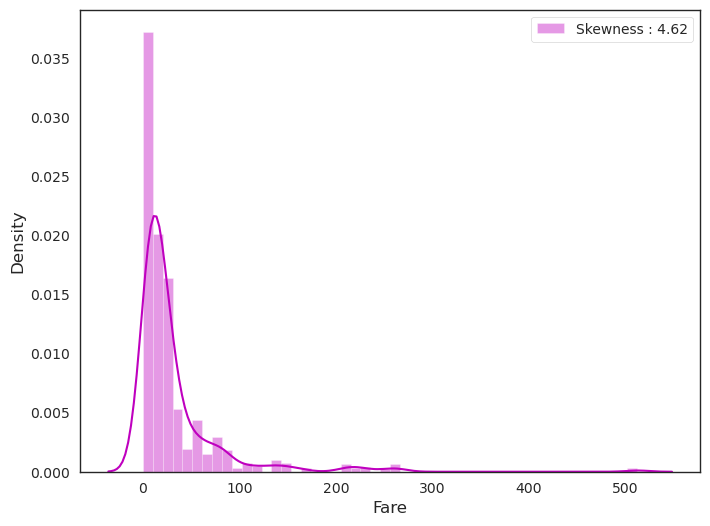

In [78]:
# Explore Fare distribution 
g = sns.distplot(df_all["Fare"], color="m", label="Skewness : %.2f"%(df_all["Fare"].skew()))
g = g.legend(loc="best")

可以发现fare的分布过于偏斜，因此可以用log函数拉平它

In [79]:
df_all["Fare"] = df_all["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

对年龄分桶

In [80]:
# Mapping Age
df_all.loc[ df_all['Age'] <= 16, 'Age'] = 0
df_all.loc[(df_all['Age'] > 16) & (df_all['Age'] <= 32), 'Age'] = 1
df_all.loc[(df_all['Age'] > 32) & (df_all['Age'] <= 48), 'Age'] = 2
df_all.loc[(df_all['Age'] > 48) & (df_all['Age'] <= 64), 'Age'] = 3
df_all.loc[ df_all['Age'] > 64, 'Age'] = 4 ;
df_all['Age'] = df_all['Age'].astype(int)

组合一部分feature

In [86]:
df_all['FamilySize'] = df_all['SibSp'] + df_all['Parch'] + 1

做label encoding and one-hot encoding

In [87]:
df_all.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,1.981001,X,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,4.266662,C,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,2.070022,X,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3.972177,C,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,2,0,0,373450,2.085672,X,S,1
5,6,0.0,3,"Moran, Mr. James",male,1,0,0,330877,2.135148,X,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,3,0,0,17463,3.948596,E,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,0,3,1,349909,3.048088,X,S,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1,0,2,347742,2.409941,X,S,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,1,0,237736,3.403555,X,C,2


In [88]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

non_numeric_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for feature in non_numeric_features:        
    df_all[feature] = LabelEncoder().fit_transform(df_all[feature])

In [89]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,154,1,1,1,0,720,1.981001,8,2,2
1,2,1.0,1,284,0,2,1,0,816,4.266662,2,0,2
2,3,1.0,3,515,0,1,0,0,914,2.070022,8,2,1
3,4,1.0,1,415,0,2,1,0,65,3.972177,2,2,2
4,5,0.0,3,22,1,2,0,0,649,2.085672,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1110,1,1,0,0,711,2.085672,8,2,1
414,1306,NaN,1,882,0,2,0,0,834,4.690430,2,0,1
415,1307,NaN,3,1037,1,1,0,0,872,1.981001,8,2,1
416,1308,NaN,3,1211,1,2,0,0,579,2.085672,8,2,1


In [92]:
cat_features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'FamilySize']
encoded_features = []

for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1, 1)).toarray()
    n = df_all[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_all.index
    encoded_features.append(encoded_df)

In [99]:
encoded_features[:]

[     Pclass_1  Pclass_2  Pclass_3
 0         0.0       0.0       1.0
 1         1.0       0.0       0.0
 2         0.0       0.0       1.0
 3         1.0       0.0       0.0
 4         0.0       0.0       1.0
 ..        ...       ...       ...
 413       0.0       0.0       1.0
 414       1.0       0.0       0.0
 415       0.0       0.0       1.0
 416       0.0       0.0       1.0
 417       0.0       0.0       1.0
 
 [1293 rows x 3 columns],
      Name_1  Name_2  Name_3  Name_4  Name_5  Name_6  Name_7  Name_8  Name_9  \
 0       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ..      ...     ...     ...     ...     ...     ...     ...     ...    

In [100]:
df_all = pd.concat([df_all, *encoded_features], axis=1)

In [101]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_9,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_9
0,1,0.0,3,154,1,1,1,0,720,1.981001,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,1,284,0,2,1,0,816,4.266662,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,515,0,1,0,0,914,2.070022,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1,415,0,2,1,0,65,3.972177,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,3,22,1,2,0,0,649,2.085672,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1110,1,1,0,0,711,2.085672,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1306,NaN,1,882,0,2,0,0,834,4.690430,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1307,NaN,3,1037,1,1,0,0,872,1.981001,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1308,NaN,3,1211,1,2,0,0,579,2.085672,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
train_data = df_all[df_all['Survived'].notnull()]
test_data = df_all[df_all['Survived'].isnull()]

In [115]:
features = [col for col in df_all.columns if col not in ['PassengerId', 'Survived']]

In [118]:
import xgboost as xgb

# get training data
x_train = train_data[features].values
# get validation data
x_valid = train_data[features].values

# initialize Logistic Regression model
model = xgb.XGBClassifier(n_jobs=-1, max_depth=20, n_estimators=200)
# fit model on training data (ohe)
model.fit(x_train, train_data.Survived.values)
# predict on validation data
# we need the probability values as we are calculating AUC
# we will use the probability of 1s
valid_preds = model.predict_proba(x_valid)[:, 1]
# get roc auc score
auc = metrics.roc_auc_score(train_data.Survived.values, valid_preds)
# print auc
print(f"AUC = {auc}")

AUC = 0.999988968925463


In [119]:
x_valid = test_data[features].values

In [122]:
valid_preds = model.predict(x_valid)
test_data['Survived'] = valid_preds


In [125]:
test_data[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [130]:
test_data[['PassengerId', 'Survived']].to_csv("./dataset/predict2.csv", index=False)


In [ ]:
predict = pd.read_csv("./dataset/test.csv")
predict.loc[:, 'Survived'] = valid_preds
predict[["PassengerId", "Survived"]].to_csv("./dataset/predict.csv", index=False)

In [75]:
# 看标签列分布情况
train_data['Survived'].value_counts()

0.0    538
1.0    337
Name: Survived, dtype: int64

根据分布情况，决定使用什么样的cross-validation， k-fold k取多大。使用什么metric来当衡量指标。
数据量并不多，分布没有非常的偏斜。
kfold? AUC?

In [10]:
# 看每一列分布情况
def first_look_data(train_data):
    for col in train_data.columns:
        print(f"Number of distinct elements for column '{col}': {train_data[col].nunique()}")
        print(f"Distinct values and their count for column '{col}':")
        print(train_data[col].value_counts())
        print("==="*20)

first_look_data(train_data)

Number of distinct elements for column 'PassengerId': 891
Distinct values and their count for column 'PassengerId':
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
Number of distinct elements for column 'Survived': 2
Distinct values and their count for column 'Survived':
0    549
1    342
Name: Survived, dtype: int64
Number of distinct elements for column 'Pclass': 3
Distinct values and their count for column 'Pclass':
3    491
1    216
2    184
Name: Pclass, dtype: int64
Number of distinct elements for column 'Name': 891
Distinct values and their count for column 'Name':
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McC

In [13]:
from sklearn import model_selection 

train_data['kfold'] = -1
train_data.sample(frac=1).reset_index(drop=True) # frac = 1是sample作用在哪个轴上，reset_index是需要把sample后的df重新换新的index https://stackoverflow.com/questions/71758460/effect-of-pandas-dataframe-sample-with-frac-set-to-1
# fetch labels
y = train_data.Survived.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=train_data, y=y)): # 填充新的 kfold 列
    train_data.loc[val_, 'kfold'] = fold 

train_data.to_csv("./dataset/train_folds.csv", index=False) # 保存划分好的数据集

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kfold
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4


做完k-fold以及选择完metric，下一步做feature engineering

先处理NA值

1. 对类别值，第一种做法：mapping到数值上，labelEncoding =>适用于树形模型
2. 对类别值，第二种做法：直接用onehot 都能用，比上面的能多用于线性模型 liner regression and SVM， 对于多维的可以用 SVD降维
3. 还有种做法：用embedding。

对于在训练集中出现很少，或者几乎不出现的，但是测试集中却有很多的类别，需要特殊考虑。例如将测试集加到一起做label encoding or onehot， 或者新加一类unknown。等等

特征选择
以及特种组合

k-fold 的作用是用来选择好的模型，确保模型在各种情况都有很好的泛化能力。比如直接按80%/20%划分，万一很难预测的都在20%里，就无法衡量模型的能力。

最终是将选择好的模型，用所有的数据去train，然后用来预测。
https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

## 问题： 如何选择K？


In [48]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from scipy import sparse
from sklearn import decomposition
import xgboost as xgb

def run(fold):
    train_data = pd.read_csv("./dataset/train_folds.csv")
    num_cols = [
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare"
    ]

    features = [
        f for f in train_data.columns if f not in ("kfold", "Survived", "PassengerId")
    ]

    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            train_data[col] = train_data[col].astype(str).fillna("NONE")

    # initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()

    # now its time to label encode the features
    for col in features:
        if col not in num_cols:

            # fit label encoder on all data
            lbl.fit(train_data[col])
            # transform all the data
            train_data[col] = lbl.transform(train_data[col])

    # get training data using folds
    df_train = train_data[train_data.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = train_data[train_data.kfold == fold].reset_index(drop=True)

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=20, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.Survived.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.Survived.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")

In [49]:
for i in range(0, 5):
    run(i)

Fold = 0, AUC = 0.8662714097496707
Fold = 1, AUC = 0.8518716577540107
Fold = 2, AUC = 0.903475935828877
Fold = 3, AUC = 0.8693850267379679
Fold = 4, AUC = 0.8677037627975003


In [38]:
def run_all_data():
    train_data = pd.read_csv("./dataset/train.csv")
    test_data = pd.read_csv("./dataset/test.csv")
    num_cols = [
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare"
    ]

    features = [
        f for f in train_data.columns if f not in ("Survived", "PassengerId")
    ]

    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            train_data[col] = train_data[col].astype(str).fillna("NONE")

    # initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()

    # now its time to label encode the features
    for col in features:
        if col not in num_cols:

            # fit label encoder on all data
            lbl.fit(train_data[col])
            # transform all the data
            train_data[col] = lbl.transform(train_data[col])

    # get training data using folds
    df_train = train_data.reset_index(drop=True)
    # get validation data using folds
    df_valid = test_data

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.Survived.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)
    # get roc auc score
    valid_preds.to_csv("./dataset/predict.csv")


In [43]:
train_data = pd.read_csv("./dataset/train.csv")
test_data = pd.read_csv("./dataset/test.csv")
num_cols = [
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare"
]

features = [
    f for f in train_data.columns if f not in ("Survived", "PassengerId")
]

for col in features:
    # do not encode the numerical columns
    if col not in num_cols:
        train_data[col] = train_data[col].astype(str).fillna("NONE")
        test_data[col] = test_data[col].astype(str).fillna("NONE")

# initialize LabelEncoder for each feature column
lbl = preprocessing.LabelEncoder()

# now its time to label encode the features
for col in features:
    if col not in num_cols:

        # fit label encoder on all data
        lbl.fit(train_data[col])
        # transform all the data
        train_data[col] = lbl.transform(train_data[col])

# initialize LabelEncoder for each feature column
lbl_test = preprocessing.LabelEncoder()

# now its time to label encode the features
for col in features:
    if col not in num_cols:

        # fit label encoder on all data
        lbl_test.fit(test_data[col])
        # transform all the data
        test_data[col] = lbl_test.transform(test_data[col])


# get training data using folds
df_train = train_data.reset_index(drop=True)
# get validation data using folds
df_valid = test_data

# get training data
x_train = df_train[features].values
# get validation data
x_valid = df_valid[features].values

# initialize Logistic Regression model
model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
# fit model on training data (ohe)
model.fit(x_train, df_train.Survived.values)
# predict on validation data
# we need the probability values as we are calculating AUC
# we will use the probability of 1s
valid_preds = model.predict(x_valid)


In [47]:
predict = pd.read_csv("./dataset/test.csv")
predict.loc[:, 'Survived'] = valid_preds
predict[["PassengerId", "Survived"]].to_csv("./dataset/predict.csv", index=False)